In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *

### Prepare the data ###

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("./data/dataset_to_release", sub_sample=True)
x_train_processed = x_train.copy()
x_train_processed = fillna_with_mean(x_train_processed)
x_train_processed = standardize(x_train_processed)
x_train_processed = add_bias(x_train_processed)
# add a column of ones
y_train_processed = y_train.copy()
y_train_processed = process_y(y_train_processed)
print(np.isnan(x_train_processed).any())

False


In [10]:
## PCA feature selection ##
x_pca, eig_vec, eig_val,weight = pca(x_train_processed, 50)
print(weight)

(6563, 50)
[1.99026100e+01+0.00000000e+00j 8.83824945e+00+0.00000000e+00j
 5.96839095e+00+0.00000000e+00j 5.27963201e+00+0.00000000e+00j
 4.74515991e+00+0.00000000e+00j 4.43052927e+00+0.00000000e+00j
 3.52373980e+00+0.00000000e+00j 3.43205788e+00+0.00000000e+00j
 3.35808778e+00+0.00000000e+00j 3.10854220e+00+0.00000000e+00j
 3.03653907e+00+0.00000000e+00j 2.99031044e+00+0.00000000e+00j
 2.78777022e+00+0.00000000e+00j 2.55074742e+00+0.00000000e+00j
 2.47028671e+00+0.00000000e+00j 2.44021943e+00+0.00000000e+00j
 2.19214395e+00+0.00000000e+00j 2.13182074e+00+0.00000000e+00j
 2.03081449e+00+0.00000000e+00j 1.94761577e+00+0.00000000e+00j
 1.90587386e+00+0.00000000e+00j 1.90074749e+00+0.00000000e+00j
 1.84871689e+00+0.00000000e+00j 1.79490247e+00+0.00000000e+00j
 1.72151037e+00+0.00000000e+00j 1.70503860e+00+0.00000000e+00j
 1.66410595e+00+0.00000000e+00j 1.59415556e+00+0.00000000e+00j
 1.55583249e+00+0.00000000e+00j 1.51367271e+00+0.00000000e+00j
 1.48232496e+00+0.00000000e+00j 1.45364001e+

/home/ivonne/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


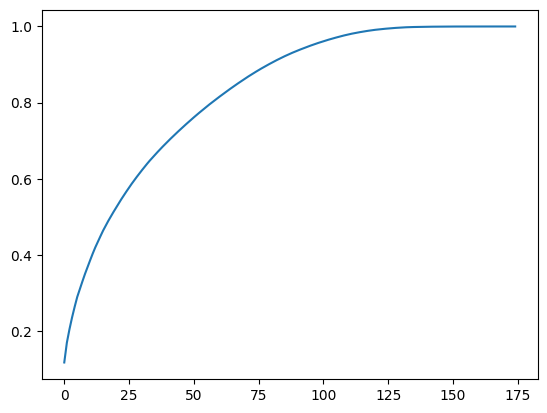

In [9]:
cummulation = np.cumsum(weight)
cummulation
plt.plot(cummulation)

In [12]:
x_pca

array([[-2.03098839+0.j, -1.70724071+0.j, -0.70166208+0.j, ...,
         0.62823782+0.j, -1.108276  +0.j, -0.12674551+0.j],
       [-1.13949644+0.j,  2.67515781+0.j, -1.21168659+0.j, ...,
        -0.15226293+0.j,  0.23719521+0.j, -0.30347162+0.j],
       [-1.28108642+0.j, -4.15058859+0.j, -1.9968919 +0.j, ...,
         0.32529305+0.j, -0.89379632+0.j,  0.04978111+0.j],
       ...,
       [12.75633816+0.j,  2.21713921+0.j, -0.37979178+0.j, ...,
        -1.34579477+0.j,  0.26304227+0.j,  0.96790177+0.j],
       [-1.07178349+0.j, -2.53646503+0.j,  1.39103057+0.j, ...,
        -0.100276  +0.j,  0.10325074+0.j, -0.57108643+0.j],
       [-2.32969221+0.j,  0.17596515+0.j,  0.52728289+0.j, ...,
        -0.018208  +0.j,  0.60802061+0.j,  0.17901644+0.j]])

### Experiment ###

In [4]:
## linear regression using all the features except for those having NaN values over 50% ##

initial_w = np.random.randn(x_train_processed.shape[1]) * 0.01
w, loss = mean_square_error_gd(y_train_processed, x_train_processed, initial_w, max_iters = 100, gamma=0.05)
y_pred = y_pred = x_train_processed @ w
y_pred_mean = np.mean(y_pred)
predict_acc(x_train_processed, y_train_processed, w, logistic=False, threshold=y_pred_mean)
predict_f1(x_train_processed, y_train_processed, w, logistic=False, threshold=y_pred_mean)

GD iter. 0/99: loss=0.05244203886433046
GD iter. 1/99: loss=0.046992050467393895
GD iter. 2/99: loss=0.04426576713125997
GD iter. 3/99: loss=0.042563377719410544
GD iter. 4/99: loss=0.04132919865216976
GD iter. 5/99: loss=0.040354035147907696
GD iter. 6/99: loss=0.03954754346090279
GD iter. 7/99: loss=0.03886356211029585
GD iter. 8/99: loss=0.03827448933376379
GD iter. 9/99: loss=0.037761789943821185
GD iter. 10/99: loss=0.03731205332335607
GD iter. 11/99: loss=0.03691511165219017
GD iter. 12/99: loss=0.03656301129305868
GD iter. 13/99: loss=0.03624938717790965
GD iter. 14/99: loss=0.03596905333966319
GD iter. 15/99: loss=0.03571772162057294
GD iter. 16/99: loss=0.03549180186495732
GD iter. 17/99: loss=0.03528825635584409
GD iter. 18/99: loss=0.03510449152502497
GD iter. 19/99: loss=0.03493827589265606
GD iter. 20/99: loss=0.034787676830929246
GD iter. 21/99: loss=0.03465101107410429
GD iter. 22/99: loss=0.034526805429352464
GD iter. 23/99: loss=0.034413765172837035
GD iter. 24/99: los

In [5]:
# logistic regression using all the features except for those having NaN values over 50% ##
initial_w = np.random.randn(x_train_processed.shape[1]) * 0.01
w, loss = logistic_regression(y_train_processed, x_train_processed, initial_w, max_iters=500, gamma=0.15)
predict_acc(x_train_processed, y_train_processed, w, logistic=True, threshold=0.5)
predict_f1(x_train_processed, y_train_processed, w, logistic=True, threshold=0.5)

GD iter. 0/499: loss=0.6927936775859926


GD iter. 1/499: loss=0.6584336164691538
GD iter. 2/499: loss=0.6305150074092856
GD iter. 3/499: loss=0.6062358027722053
GD iter. 4/499: loss=0.5844614076094538
GD iter. 5/499: loss=0.5646146058983955
GD iter. 6/499: loss=0.5463629125631273
GD iter. 7/499: loss=0.5294911449104092
GD iter. 8/499: loss=0.5138442083783207
GD iter. 9/499: loss=0.4993004001075236
GD iter. 10/499: loss=0.4857584729233072
GD iter. 11/499: loss=0.473131054483384
GD iter. 12/499: loss=0.46134107779844663
GD iter. 13/499: loss=0.45031968371295567
GD iter. 14/499: loss=0.44000487190657245
GD iter. 15/499: loss=0.4303405524726676
GD iter. 16/499: loss=0.4212758260942951
GD iter. 17/499: loss=0.41276440493330696
GD iter. 18/499: loss=0.40476412742966644
GD iter. 19/499: loss=0.3972365407860924
GD iter. 20/499: loss=0.39014653552509654
GD iter. 21/499: loss=0.38346202216750813
GD iter. 22/499: loss=0.37715364322597833
GD iter. 23/499: loss=0.37119451553686833
GD iter. 24/499: loss=0.3655599990775419
GD iter. 25/499: 

In [13]:
# ridge regression using all the features except for those having NaN values over 50% ##
w, loss = ridge_regression(y_train_processed, x_train_processed, lambda_=0.001)
y_pred = y_pred = x_train_processed @ w
y_pred_mean = np.mean(y_pred)
predict_acc(x_train_processed, y_train_processed, w, logistic=False, threshold=y_pred_mean)
predict_f1(x_train_processed, y_train_processed, w, logistic=False, threshold=y_pred_mean)

The Accuracy is: 0.6300
The F1 score is: 0.2991
The precision is: 0.1784
The recall is: 0.9234


In [11]:
## linear regression using PCA feature selection ##

initial_w = np.random.randn(x_pca.shape[1]) * 0.01
w, loss = mean_square_error_gd(y_train_processed, x_pca, initial_w, max_iters = 100, gamma=0.1)
y_pred = x_pca @ w
y_pred_mean = np.mean(y_pred)
predict_acc(x_pca, y_train_processed, w, logistic=False, threshold=y_pred_mean)
predict_f1(x_pca, y_train_processed, w, logistic=False, threshold=y_pred_mean)

GD iter. 0/99: loss=(0.052871086847053966+0j)
GD iter. 1/99: loss=(0.04238291130638302+0j)
GD iter. 2/99: loss=(0.040326566175738675+0j)
GD iter. 3/99: loss=(0.03936491064666693+0j)
GD iter. 4/99: loss=(0.038795757929153456+0j)
GD iter. 5/99: loss=(0.03842162757285372+0j)
GD iter. 6/99: loss=(0.03816273621251975+0j)
GD iter. 7/99: loss=(0.037978512631980904+0j)
GD iter. 8/99: loss=(0.0378450945799688+0j)
GD iter. 9/99: loss=(0.03774722452434276+0j)
GD iter. 10/99: loss=(0.037674670273025034+0j)
GD iter. 11/99: loss=(0.0376203698136672+0j)
GD iter. 12/99: loss=(0.0375793569256343+0j)
GD iter. 13/99: loss=(0.037548092460087897+0j)
GD iter. 14/99: loss=(0.037524028463705464+0j)
GD iter. 15/99: loss=(0.037505315343687416+0j)
GD iter. 16/99: loss=(0.03749060099013997+0j)
GD iter. 17/99: loss=(0.03747889086520389+0j)
GD iter. 18/99: loss=(0.03746944939939819+0j)
GD iter. 19/99: loss=(0.03746172982844771+0j)
GD iter. 20/99: loss=(0.03745532385844996+0j)
GD iter. 21/99: loss=(0.037449925297180

In [7]:
# logistic regression using pca feature selection #
initial_w = np.random.randn(x_train_processed.shape[1]) * 0.01
w, loss = logistic_regression(y_train_processed, x_train_processed, initial_w, max_iters=100, gamma=0.15)
predict_acc(x_train_processed, y_train_processed, w, logistic=True, threshold=0.5)
predict_f1(x_train_processed, y_train_processed, w, logistic=True, threshold=0.5)

GD iter. 0/99: loss=0.6953251025133772
GD iter. 1/99: loss=0.6597077787630218
GD iter. 2/99: loss=0.6309233895484205
GD iter. 3/99: loss=0.6061935263709747
GD iter. 4/99: loss=0.5841908431516583
GD iter. 5/99: loss=0.564231274482722
GD iter. 6/99: loss=0.5459285501914203
GD iter. 7/99: loss=0.5290397934882721
GD iter. 8/99: loss=0.5133950886416532
GD iter. 9/99: loss=0.498864480579501
GD iter. 10/99: loss=0.48534195479049397
GD iter. 11/99: loss=0.47273729457207225
GD iter. 12/99: loss=0.4609716910211406
GD iter. 13/99: loss=0.44997519819811815
GD iter. 14/99: loss=0.4396851312026764
GD iter. 15/99: loss=0.4300449696135705
GD iter. 16/99: loss=0.42100354796753364
GD iter. 17/99: loss=0.41251442064614746
GD iter. 18/99: loss=0.4045353407299958
GD iter. 19/99: loss=0.3970278188435656
GD iter. 20/99: loss=0.38995674183797513
GD iter. 21/99: loss=0.38329003862418126
GD iter. 22/99: loss=0.3769983846551128
GD iter. 23/99: loss=0.3710549390028115
GD iter. 24/99: loss=0.36543510947627594
GD i